In [106]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Tamano de graficas
sns.set(rc={'figure.figsize':(16,10)})

# Seccion 1

### Repasemos algunas propiedades de los estadisticos
Si lo deseas puedes reviar la documentacion de Numpy y ver las caracteristicas de la funcion normal: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [107]:
def statistics(x):
  print('Media Muestral: ',x.mean())
  print('Varianza Muestral: ',x.var())

In [108]:
# Crear la semilla
np.random.seed(3245)
n= 1000
# x~Normal(0,1)
x = np.random.normal(loc=0, scale=1, size=n)
print('Normal(0,1)')
statistics(x)


Normal(0,1)
Media Muestral:  0.006479187983895233
Varianza Muestral:  0.9956471749641369


#### Que pasa si multiplicamos x por una constante C?
Te recomendamos jugar en este laboratorio con las constante, y ver que pasa con los estadisticos.

In [109]:
print('C = 10')
statistics(10*x)

print()
print('C = -1')
statistics(-1*x)

print()
print('C = 0')
statistics(0*x)

C = 10
Media Muestral:  0.06479187983895232
Varianza Muestral:  99.56471749641368

C = -1
Media Muestral:  -0.006479187983895233
Varianza Muestral:  0.9956471749641369

C = 0
Media Muestral:  0.0
Varianza Muestral:  0.0


### Que pasa si x es igual a una constante?


In [110]:
print(' x = constante')
statistics(np.array([100]*1000))


print(' x = constante')
statistics(np.array([-1]*1000))

 x = constante
Media Muestral:  100.0
Varianza Muestral:  0.0
 x = constante
Media Muestral:  -1.0
Varianza Muestral:  0.0


Una varianza igual a cero implica que la variable es una constante?

La respuesta es si!

### Observemos que pasa con los boxplots cuando multiplicamos por una constante a x

Boxplot Normal(0,1)


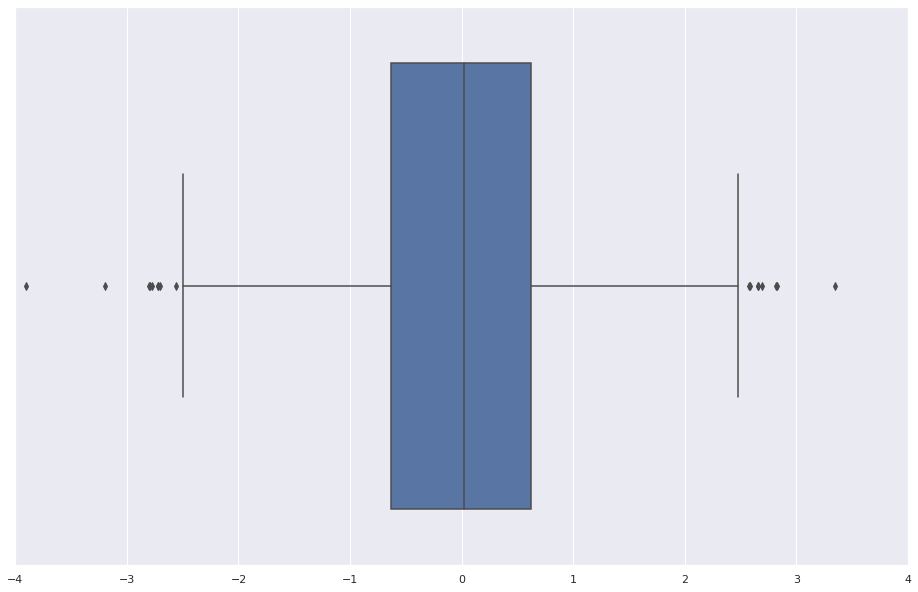

In [111]:
print('Boxplot Normal(0,1)')
sns.boxplot(x)

Boxplot Normal(0,10)


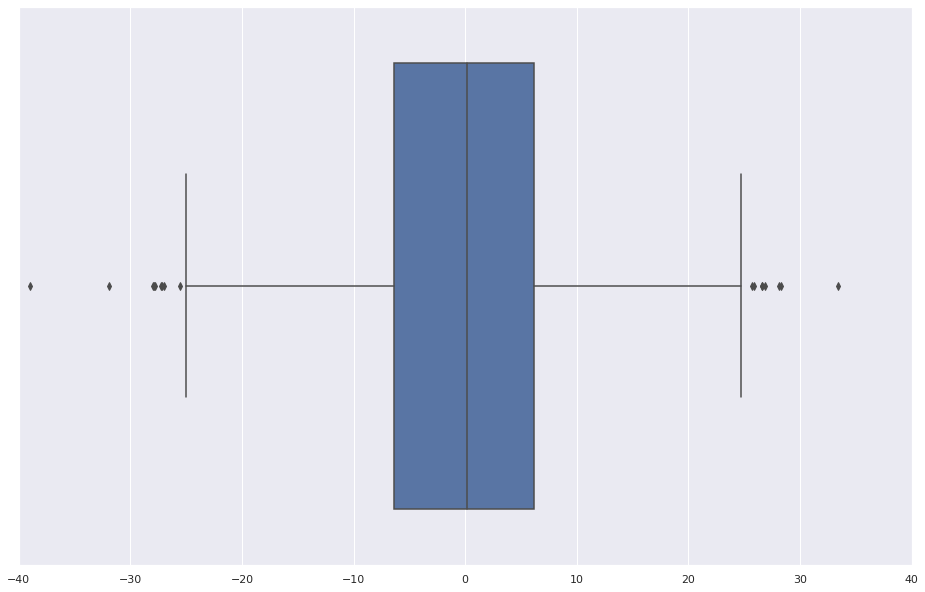

In [112]:
print('Boxplot Normal(0,10)')
sns.boxplot(x*10)

Boxplot Normal(0,.1)


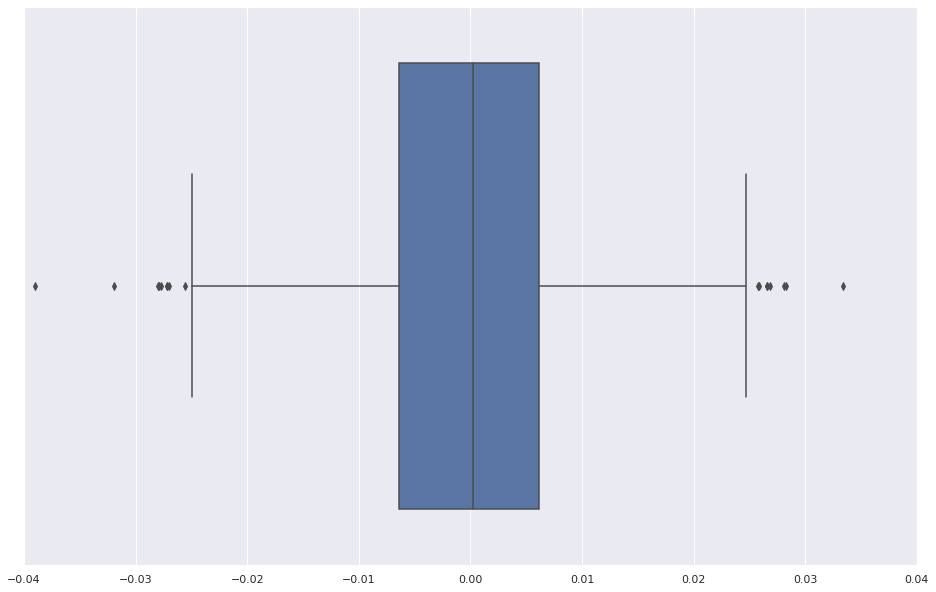

In [113]:
print('Boxplot Normal(0,.1)')
sns.boxplot(x*.01)

Boxplot Normal(-10,1)


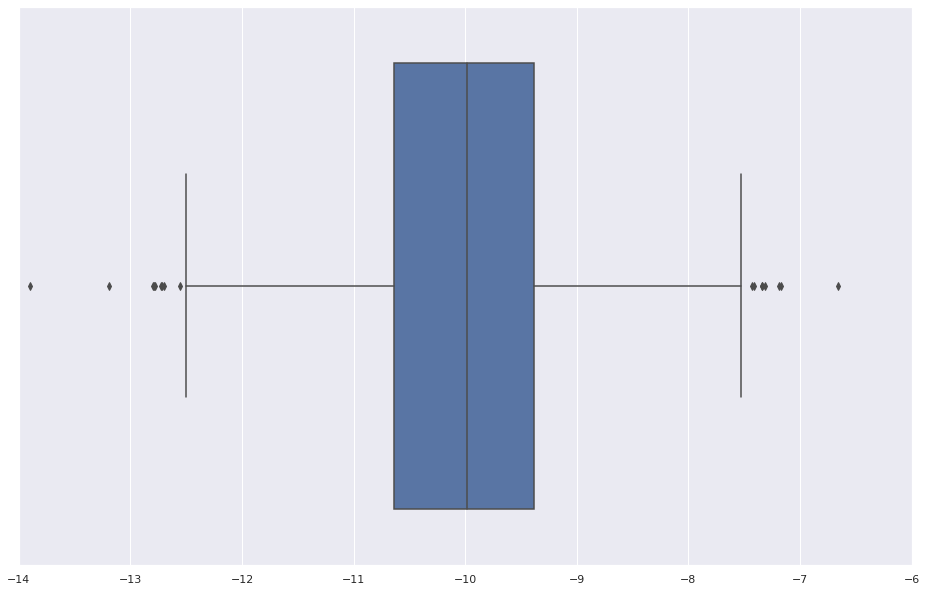

In [114]:
print('Boxplot Normal(-10,1)')
sns.boxplot(x-10)

### Que pasa con el boxplot si aplicamos una transformacion (una funcion) a x?

Piensalo detenidamente. La forma del boxplot cambiara?

Sqrt(x)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


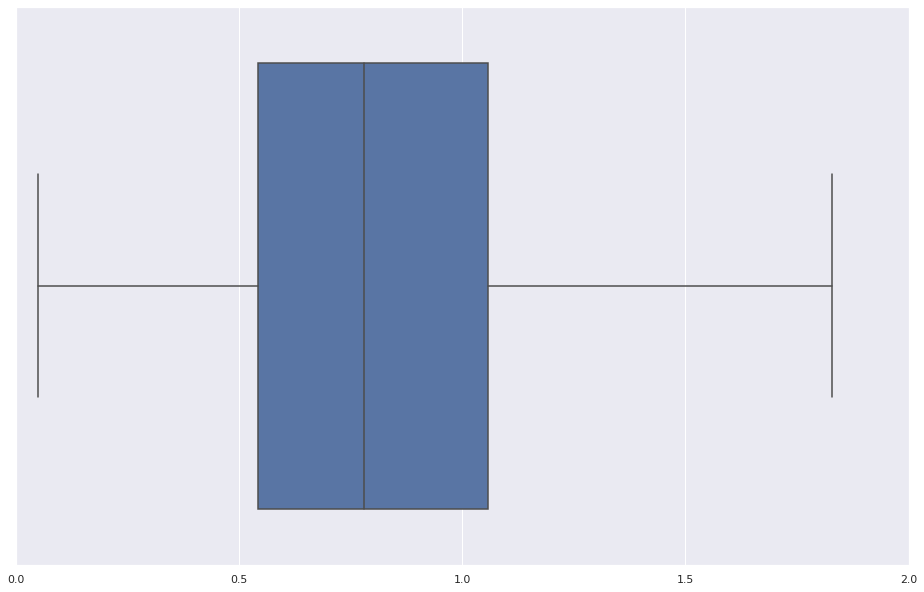

In [115]:
print('Sqrt(x)')
sns.boxplot(np.sqrt(x))

x^2


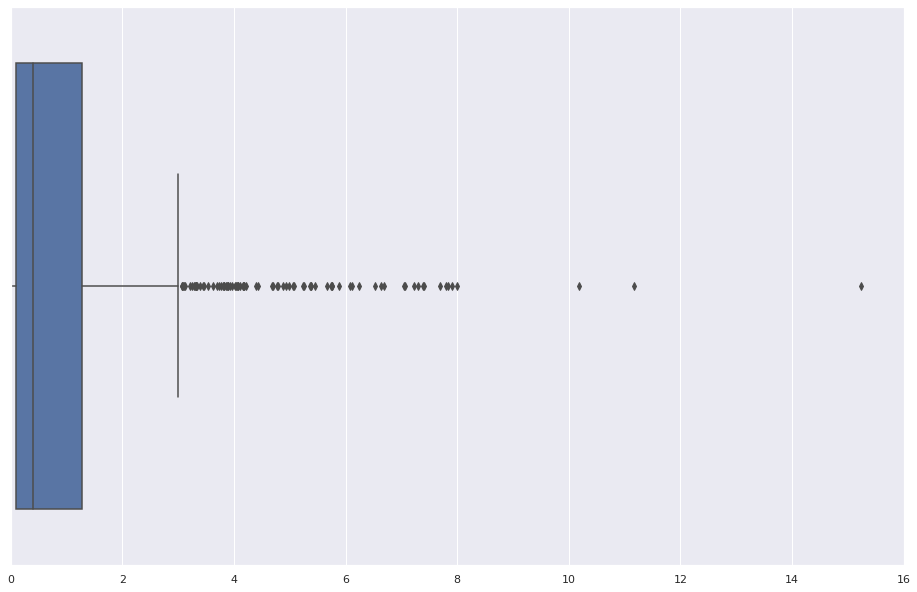

In [116]:
print('x^2')
sns.boxplot(np.power(x,2))

x^3


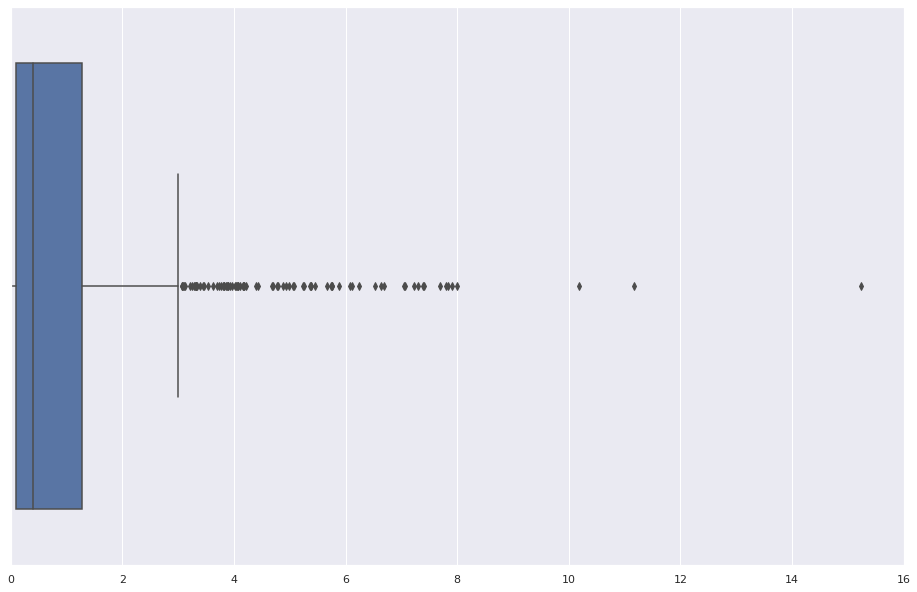

In [117]:
print('x^3')
sns.boxplot(np.power(x,2))

log(|x|)


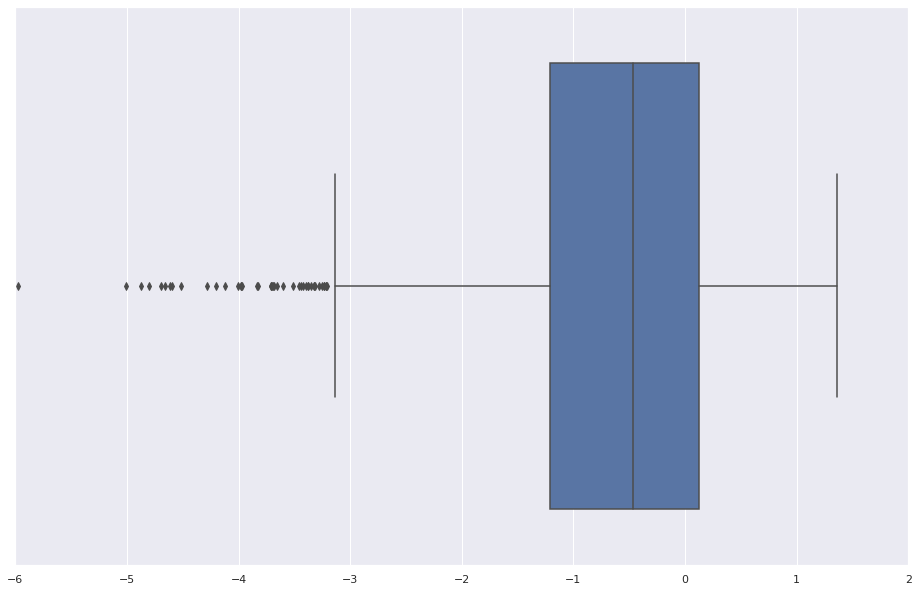

In [118]:
print('log(|x|)')
sns.boxplot(np.log(np.abs(x)))

#### Como puedes observar, las transformaciones funcionales de la variable x alteran la forma de los boxplots. Existen ocasiones donde es conveniente visualizar nuestras variables bajo diferentes transformaciones. En especial cuando creamos nuevas variables.

### Observemos que pasa con la variable y ~ N(10,10)

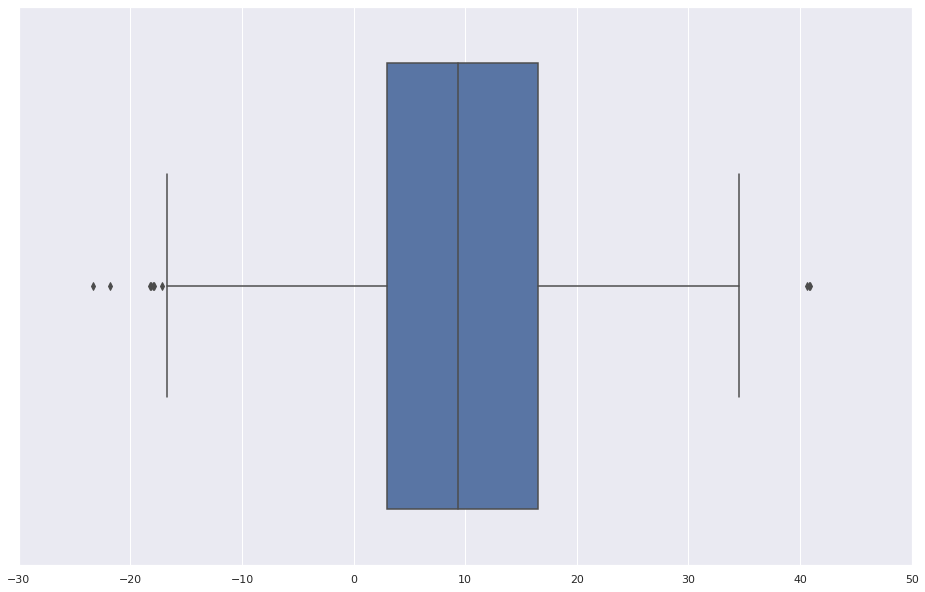

In [119]:
# Crear la semilla
np.random.seed(32445)
# y~Normal(10,10)
y = np.random.normal(loc=10, scale=10, size=n)

sns.boxplot(y)

#### Que pasa si a y le restamos su media, y la dividimos entre su std?

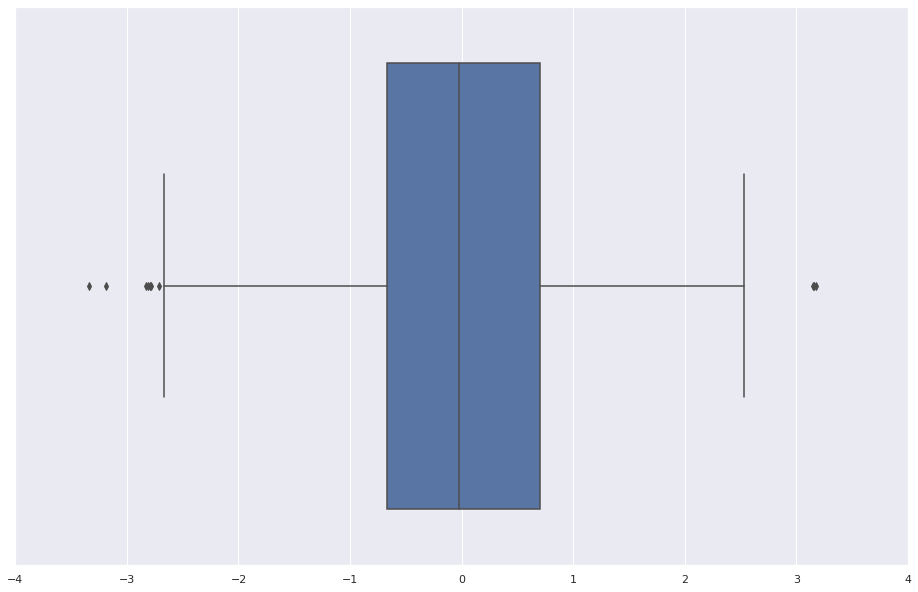

In [120]:
# Y normalizada
sns.boxplot((y-np.mean(y))/np.std(y))

Que pasa si aumentamos la varianza, pero dejamos constante la media?


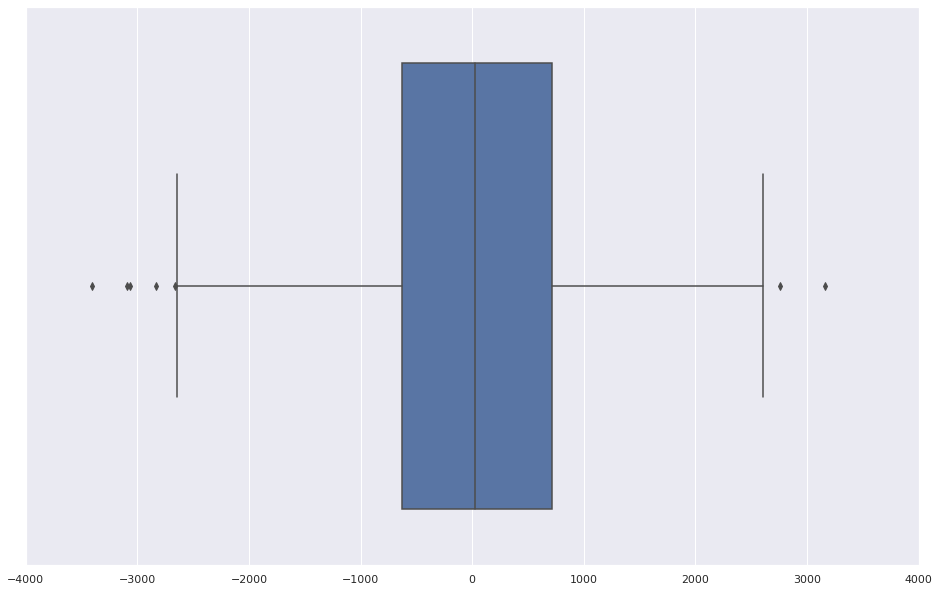

In [121]:
np.random.seed(4245)
# z~Normal(10,1000)
z = np.random.normal(loc=10, scale=1000, size=n)
sns.boxplot(z)

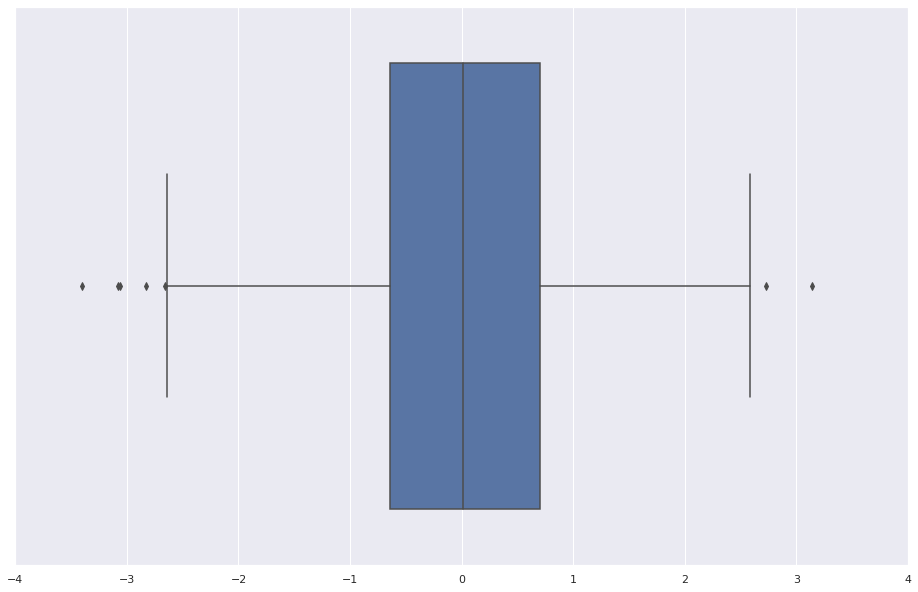

In [122]:
# Z normalizada
sns.boxplot((z-np.mean(z))/np.std(z))

Como puedes observar, la forma del boxplot no se ve demasiado alterada cuando restamos la media y dividimos la variable entre su std. Aunque, la escala si se ve alterada.

#### Pero, que pasa si la variable no se distribuye normal?


In [ ]:
np.random.seed(987)
w = np.random.chisquare(4,n)
sns.boxplot(w)

In [ ]:
sns.boxplot((w-np.mean(w))/np.std(w))

Parece que la forma del boxplot no se ve alterada sustancialmente. Si lo piensas detenidamente, unicamente estamos restando una constante, y luego multiplicamos por otra.

## Existen muchas transformaciones que podemos aplicar a nuestras variables. Si tienes duda de que podria pasar, te recomendamos jugar/graficar para obetener intuicion.


# Seccion 2

### En esta seccion utilizaremos el metodo .distplot de seaborn. Si tienes dudas revidsa su documentacion.


In [ ]:
print('X ~ N(0,1)')
sns.distplot(x)

In [ ]:
print('X ~ N(0,10)')
sns.distplot(x*10)

In [ ]:
print('X ~ N(-10,1)')
sns.distplot(x - 10)

In [ ]:
print('W ~ Chi(4)')
sns.distplot(w)

In [ ]:
def plots(x):
  fig, ax =plt.subplots(1,2)
  sns.boxplot(x, ax=ax[0])
  sns.distplot(x, ax=ax[1])
  fig.show()

In [ ]:
plots(w)